# Model Training for Real Time Communication through AI for Specially Abled 



# LOADING AND DEPLOYING THE DATASET

# TEAM ID:PNT2022TMID1708


# TEAM LEAD:Pulla Sai Venkata Ashrith  S.

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install tensorflow==2.7.1

     |████████████████████████████████| 495.2 MB 29 kB/s s eta 0:00:01
     |████████████████████████████████| 14.1 MB 29.9 MB/s eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2


# Importing the packages.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

# linking the streaming_body

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Lzw27RyYAXpOXEjMhc04K638iQocziOKd5DbxFuLpmhc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunication-donotdelete-pr-e7yebdi9hvsfug'
object_key = 'Dataset.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# unzipping the dataset

In [6]:
# Unzip the Dataset Zip File
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_4.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [7]:
%%bash
ls Dataset

test_set
training_set


In [8]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [9]:
print("Length of x-train : ", len(x_train))
print("Length of x-test : ", len(x_test))

Length of x-train :  18
Length of x-test :  3


In [10]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

### Model Creation

In [11]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [12]:
# Creating Model
model=Sequential()

In [13]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Adding Output Layer
model.add(Dense(9,activation='softmax'))

In [14]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/1042518445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
18/18 [==============================] - 71s 4s/step - loss: 1.1343 - accuracy: 0.6152 - val_loss: 0.4147 - val_accuracy: 0.9058
Epoch 2/10
18/18 [==============================] - 69s 4s/step - loss: 0.2602 - accuracy: 0.9239 - val_loss: 0.2582 - val_accuracy: 0.9320
Epoch 3/10
18/18 [==============================] - 71s 4s/step - loss: 0.1165 - accuracy: 0.9669 - val_loss: 0.2227 - val_accuracy: 0.9587
Epoch 4/10
18/18 [==============================] - 72s 4s/step - loss: 0.0610 - accuracy: 0.9846 - val_loss: 0.2374 - val_accuracy: 0.9698
Epoch 5/10
18/18 [==============================] - 73s 4s/step - loss: 0.0357 - accuracy: 0.9902 - val_loss: 0.2313 - val_accuracy: 0.9707
Epoch 6/10
18/18 [==============================] - 72s 4s/step - loss: 0.0265 - accuracy: 0.9939 - val_loss: 0.2498 - val_accuracy: 0.9756
Epoch 7/10
18/18 [==============================] - 71s 4s/step - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.2795 - val_accuracy: 0.9756
Epoch 8/10
18/18 [==

### Saving the Model

In [16]:
model.save('SANJAI.h5')
# Current accuracy is 0.825

In [17]:
# Convert the Saved Model to a Tar Compressed Format
!tar -zcvf trainedModel.tgz SANJAI.h5

SANJAI.h5


In [18]:
%%bash
ls -ll

total 210000
drwxrwx--- 4 wsuser wscommon      4096 Nov 16 19:02 Dataset
-rw-rw---- 1 wsuser wscommon 111324760 Nov 16 19:15 SANJAI.h5
-rw-rw---- 1 wsuser wscommon 103709912 Nov 16 19:15 trainedModel.tgz


### Watson Machine Learning

In [19]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 8.4 MB/s eta 0:00:01


In [20]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "_c84HIUddEc74mO6dInb_l1g8FNC4l3OAAIocQOhaWCI"
}

client = APIClient(wml_credentials)

In [21]:
client

### Save to Deployment Space

In [22]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [23]:
space_uid = guid_from_space_name(client, 'Real_Time')
print("Space UID : ", space_uid)

Space UID :  40cfd62c-38d1-4f55-b4a6-c1b77eab8cf5


In [24]:
client.set.default_space(space_uid)

'SUCCESS'

In [25]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [26]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [27]:
model_details = client.repository.store_model(model='trainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_id(model_details)

In [28]:
model_id

'4154aedd-4fff-46f6-b056-ea4e566d3643'

In [29]:
client.repository.download(model_id,'SANJAI1.tar.gz')

Successfully saved model content to file: 'SANJAI1.tar.gz'


'/home/wsuser/work/SANJAI1.tar.gz'

# TESTING PART OF MODEL

In [30]:
#Testing the model.
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('SANJAI.h5')
img=image.load_img(r'/home/wsuser/work/Dataset/test_set/A/1.png',
                   target_size=(64,64))

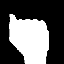

In [32]:
img

In [33]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'A'

In [34]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/C/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'C'

In [35]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/I/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'I'

In [36]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/E/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'E'

In [37]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/F/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'F'

Accuracy is over 90+ percentage because of the overfitting phenomenon.when we test our model with live data then the accuracy will decrease.